# Antarctic Mass loss

<img src="ipynb.images/ice_sheet1.jpg" width=800 />

Antarctica experienced a sixfold increase in yearly ice mass loss between 1979 and 2017

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv('climate_data.csv')
data.head(10)

,Date,Solar Radiation,UV radiation,Highest Infrared radiation,Air temperature,N2O level,Antarctic mass(Gigatonnes),Antarctic mass 1-sigma uncertainty,DETER,DETER TTM,SAD,SAD TTM
0,2010-01,171.46,10.24,346.41,7.43,323.70,-803.23,33.03,23,2905,63,1915
1,2010-02,216.36,16.83,360.59,8.83,323.85,-807.45,32.76,185,2947,88,1941
2,2010-03,268.88,29.48,382.27,11.67,323.94,-688.18,34.51,52,2981,76,1960
3,2010-04,320.56,43.18,408.13,14.50,324.08,-759.94,32.20,52,2996,65,1904
4,2010-05,404.24,56.52,439.41,18.38,323.85,-780.91,32.63,110,2982,96,1843
5,2010-06,436.70,69.21,495.04,27.64,323.73,-794.11,38.44,244,2647,172,1865
6,2010-07,399.97,68.43,524.21,32.51,323.66,-998.22,35.63,485,2296,155,1488
7,2010-08,438.29,60.29,524.21,32.51,323.47,-927.15,34.62,265,2063,210,1425
8,2010-09,408.54,46.55,473.62,26.35,323.49,-848.74,36.40,448,2111,170,1379
9,2010-10,233.63,25.60,417.23,18.38,323.66,-880.52,38.44,389,2324,153,1338


# Get the data only for Antarctic ice mass from 2010 to 2019

In [5]:
final= data.copy()
final.set_index('Date',inplace=True)

In [6]:
cols = ['Solar Radiation','UV radiation','Highest Infrared radiation','N2O level', 'DETER', 'DETER TTM', 'SAD', 'SAD TTM','Antarctic mass 1-sigma uncertainty']
final =final.drop(cols,axis=1)

In [21]:
ice_mass = final[['Antarctic mass(Gigatonnes)']].copy()
ice_mass.tail(5)

,Antarctic mass(Gigatonnes)
Date,
2019-08,-2228.62
2019-09,-2100.59
2019-10,-2281.08
2019-11,-2341.65
2019-12,-2387.01


# Use LSTM to get the predicted 2019 ice mass data based on the current data

In [22]:
ice_mass.index=pd.to_datetime(ice_mass.index)
train,test=ice_mass[:-12],ice_mass[-12:]

scaler= MinMaxScaler()
scaler.fit(train)
train=scaler.transform(train)

n_input=12
n_features=1
'[]'
generator=TimeseriesGenerator(train,train, length=n_input, batch_size=10)

model=Sequential()
model.add(LSTM(50,activation='relu',input_shape=(n_input,n_features)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

model.fit_generator(generator, epochs=600)



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/600
10/10 [==============================] - 0s 33ms/step - loss: 0.2625
Epoch 2/600
10/10 [==============================] - 0s 5ms/step - loss: 0.2070
Epoch 3/600
10/10 [==============================] - 0s 6ms/step - loss: 0.1519
Epoch 4/600
10/10 [==============================] - 0s 5ms/step - loss: 0.1056
Epoch 5/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0608
Epoch 6/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0279
Epoch 7/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0237
Epoch 8/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0195
Epoch 9/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0257
Epoch 10/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0194
Epoch 11/600
10/10 [==============================] - 0s 5ms/step - loss: 0.01

10/10 [==============================] - 0s 5ms/step - loss: 0.0081
Epoch 96/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0090
Epoch 97/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0108
Epoch 98/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0078
Epoch 99/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0079
Epoch 100/600
10/10 [==============================] - 0s 6ms/step - loss: 0.0061
Epoch 101/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0082
Epoch 102/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0062
Epoch 103/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0095
Epoch 104/600
10/10 [==============================] - 0s 6ms/step - loss: 0.0076
Epoch 105/600
10/10 [==============================] - 0s 6ms/step - loss: 0.0087
Epoch 106/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0062
Epoch 107/600
10/10 [=============

10/10 [==============================] - 0s 5ms/step - loss: 0.0066
Epoch 196/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0063
Epoch 197/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0062
Epoch 198/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0076
Epoch 199/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0060
Epoch 200/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0058
Epoch 201/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0070
Epoch 202/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0074
Epoch 203/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0068
Epoch 204/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0069
Epoch 205/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0066
Epoch 206/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0055
Epoch 207/600
10/10 [=========

10/10 [==============================] - 0s 5ms/step - loss: 0.0046
Epoch 296/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0050
Epoch 297/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0054
Epoch 298/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0048
Epoch 299/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0054
Epoch 300/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0052
Epoch 301/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0054
Epoch 302/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0054
Epoch 303/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0067
Epoch 304/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0051
Epoch 305/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0065
Epoch 306/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0071
Epoch 307/600
10/10 [=========

10/10 [==============================] - 0s 5ms/step - loss: 0.0042
Epoch 396/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0058
Epoch 397/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0050
Epoch 398/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0049
Epoch 399/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0056
Epoch 400/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0055
Epoch 401/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0044
Epoch 402/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0039
Epoch 403/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0046
Epoch 404/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0074
Epoch 405/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0065
Epoch 406/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0045
Epoch 407/600
10/10 [=========

10/10 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 496/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0043
Epoch 497/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0052
Epoch 498/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0042
Epoch 499/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0048
Epoch 500/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 501/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0038
Epoch 502/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0056
Epoch 503/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0042
Epoch 504/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0042
Epoch 505/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0038
Epoch 506/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0042
Epoch 507/600
10/10 [=========

10/10 [==============================] - 0s 5ms/step - loss: 0.0049
Epoch 596/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0049
Epoch 597/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0036
Epoch 598/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0052
Epoch 599/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 600/600
10/10 [==============================] - 0s 5ms/step - loss: 0.0038


In [23]:
prediction=[]
batch=train[-n_input:].reshape((1,n_input,n_features))

for i in range(n_input):
    prediction.append(model.predict(batch)[0])
    batch=np.append(batch[:,1:,:],[[prediction[i]]],axis=1)

In [24]:
prediction=pd.DataFrame(scaler.inverse_transform(prediction),index = ice_mass[-n_input:].index)

In [25]:
prediction

,0
Date,
2019-01-01,-2338.401274
2019-02-01,-2330.734200
2019-03-01,-2320.213400
2019-04-01,-2307.719031
2019-05-01,-2292.891788
2019-06-01,-2276.041561
2019-07-01,-2257.110765
2019-08-01,-2236.199926
2019-09-01,-2213.484485


# Combine the 2019 test data with 2019 predicted data

In [26]:
df1=pd.concat([ice_mass,prediction],axis=1)
df1.tail(13)

,Antarctic mass(Gigatonnes),0
Date,,
2018-12-01,-2359.65,NaN
2019-01-01,-2368.66,-2338.401274
2019-02-01,-2411.65,-2330.734200
2019-03-01,-2315.96,-2320.213400
2019-04-01,-2135.25,-2307.719031
2019-05-01,-2187.12,-2292.891788
2019-06-01,-2279.94,-2276.041561
2019-07-01,-2183.65,-2257.110765
2019-08-01,-2228.62,-2236.199926


<img src="ipynb.images/ice_sheet_gif2.gif" width=600 />
315 billion-tonne iceberg breaks off Antarctica

# Plot the test 2019 data with predict 2019 data

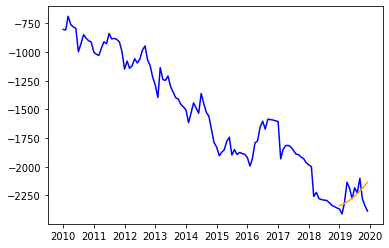

In [27]:
plt.figsize=(15,10)

plt.plot(df1['Antarctic mass(Gigatonnes)'],color='blue')
plt.plot(df1[0],color='orange')


# Create a differenced series and invert it

In [90]:
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

In [92]:
series = pd.read_csv('Antarctic mass 2010.csv')
series

,Time,Antarctic mass(Gigatonnes)
0,2010-01,-803.23
1,2010-02,-807.45
2,2010-03,-688.18
3,2010-04,-759.94
4,2010-05,-780.91
...,...,...
115,2019-08,-2228.62
116,2019-09,-2100.59
117,2019-10,-2281.08
118,2019-11,-2341.65


# Get the differenced between years

In [93]:
# difference
X = series[['Antarctic mass(Gigatonnes)']].values
days_in_year = 12
differenced = difference(X, days_in_year)
differenced

[array([-199.27]),
 array([-212.01]),
 array([-342.36]),
 array([-205.93]),
 array([-129.98]),
 array([-133.42]),
 array([159.27]),
 array([41.64]),
 array([-32.3]),
 array([-30.07]),
 array([-30.235]),
 array([-39.18]),
 array([-146.22]),
 array([-59.61]),
 array([-111.5]),
 array([-153.91]),
 array([-147.22]),
 array([-168.45]),
 array([-223.97]),
 array([-98.8]),
 array([-65.91]),
 array([-158.07]),
 array([-187.375]),
 array([-216.68]),
 array([-140.32]),
 array([-318.1]),
 array([6.09]),
 array([-119.91]),
 array([-189.59]),
 array([-113.42]),
 array([-237.73]),
 array([-364.52]),
 array([-452.33]),
 array([-351.728571]),
 array([-339.279286]),
 array([-326.83]),
 array([-216.58]),
 array([-219.24]),
 array([-400.58]),
 array([-204.2]),
 array([-238.64]),
 array([-324.81]),
 array([-60.98]),
 array([-102.39]),
 array([-127.67]),
 array([-182.291429]),
 array([-220.120714]),
 array([-257.95]),
 array([-323.18]),
 array([-288.12]),
 array([-338.34]),
 array([-408.78]),
 array([-292.

# Using ARIMA to predict the future 2020 data

In [164]:
from statsmodels.tsa.arima_model import ARIMA
# fit model
model = ARIMA(differenced, order=(1,0,0))
model_fit = model.fit(disp=0)
# multi-step out-of-sample forecast
start_index = len(differenced)
end_index = start_index + 11
forecast = model_fit.predict(start=start_index, end=end_index)
# invert the differenced forecast to something usable
history = [x for x in X]
day = 1

pred = []
for yhat in forecast:
	inverted = inverse_difference(history, yhat, days_in_year)
	pred.append(inverted)
	#print('Day %d: %f' % (day, inverted))
	history.append(inverted)
	day += 1

In [165]:
import itertools
pred = list(itertools.chain.from_iterable(pred))

In [166]:
pred_df = pd.DataFrame({'future_ice':pred})
pred_df

,future_ice
0,-2442.653187
1,-2499.498357
2,-2415.321796
3,-2244.179292
4,-2303.999739
5,-2403.426441
6,-2312.626512
7,-2362.158679
8,-2237.919772
9,-2421.560113


# Generate 2020 future dates

In [167]:
from pandas.tseries.offsets import DateOffset
add_dates=[ice_mass.index[-1] + DateOffset(months=x) for x in range(0,13)]
future_dates=pd.DataFrame(index=add_dates[1:],columns=pred_df.columns)
future_dates2=pd.DataFrame(index=add_dates[1:],columns=ice_mass.columns)

future_dates

,future_ice
2020-01-01,NaN
2020-02-01,NaN
2020-03-01,NaN
2020-04-01,NaN
2020-05-01,NaN
2020-06-01,NaN
2020-07-01,NaN
2020-08-01,NaN
2020-09-01,NaN
2020-10-01,NaN


In [168]:
pred_df = pred_df.set_index(future_dates.index)
pred_df

,future_ice
2020-01-01,-2442.653187
2020-02-01,-2499.498357
2020-03-01,-2415.321796
2020-04-01,-2244.179292
2020-05-01,-2303.999739
2020-06-01,-2403.426441
2020-07-01,-2312.626512
2020-08-01,-2362.158679
2020-09-01,-2237.919772
2020-10-01,-2421.560113


# Combine the future prediction with the current data

In [170]:
final_df=pd.concat([ice_mass,pred_df],axis=1)

len(final_df)

132

In [172]:
final_df.tail(13)

,Antarctic mass(Gigatonnes),future_ice
2019-12-01,-2387.01,NaN
2020-01-01,NaN,-2442.653187
2020-02-01,NaN,-2499.498357
2020-03-01,NaN,-2415.321796
2020-04-01,NaN,-2244.179292
2020-05-01,NaN,-2303.999739
2020-06-01,NaN,-2403.426441
2020-07-01,NaN,-2312.626512
2020-08-01,NaN,-2362.158679
2020-09-01,NaN,-2237.919772


<img src="ipynb.images/ice_sheet_gif3.gif" width=800 />

# Plot the prediction for future 2020 ice mass data

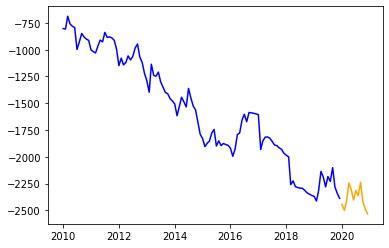

In [174]:
plt.figsize=(15,10)

plt.plot(final_df['Antarctic mass(Gigatonnes)'],color='blue')
plt.plot(final_df['future_ice'],color='orange')


In [182]:
future = pd.concat([ice_mass,pred_df.rename(columns={'future_ice':'Antarctic mass(Gigatonnes)'})])
future.tail()

,Antarctic mass(Gigatonnes)
2020-08-01,-2362.158679
2020-09-01,-2237.919772
2020-10-01,-2421.560113
2020-11-01,-2484.748000
2020-12-01,-2532.283424


# Antarctic temperature

<img src="ipynb.images/ice_sheet3.jpg" width=800 />

# Using weather API to generate the Antarctic temperature from 2010 to 2019

In [200]:
import urllib
import json
import pandas as pd
import matplotlib.pyplot as plt

years=['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
mnths=['01','02','03','04','05','06','07','08','09','10','11','12']
st='010000'
end='280000'
avg_temps=[]
for y in years:
    for m in mnths:
        args = {
            'start':y+m+st,
            'end':y+m+end,
            'latitude':-75.2509766,
            'longitude':-0.071389,
            'obtimezone':'UTC',
            'vars':'air_temp',
            'stids':'KSEA',
            'units':'temp|C',
            'token':'b208e0ddb73c44e089612fad4843661e'
            }
        apiString = urllib.parse.urlencode(args)
        url = "http://api.mesowest.net/v2/stations/timeseries"
        fullUrl = '{}?{}'.format(url,apiString)
        response = urllib.request.urlopen(fullUrl)
        responseDict = json.loads(response.read())
        airT = responseDict['STATION'][0]['OBSERVATIONS']['air_temp_set_1']
        ksea = pd.Series(airT)
        avg_temps.append(ksea.mean())
 
index_list=[]
for y in years:
    for m in mnths:
        index_list.append(y+'-'+m)
    
    
avg_antartemps=pd.DataFrame({'Date':index_list,
                              'Temperature':avg_temps})
avg_antartemps=avg_antartemps.set_index(['Date'])
avg_antartemps.index=pd.to_datetime(avg_antartemps.index)
avg_antartemps

,Temperature
Date,
2010-01-01,8.058364
2010-02-01,7.877839
2010-03-01,8.060159
2010-04-01,9.064482
2010-05-01,11.049476
...,...
2019-08-01,19.958329
2019-09-01,17.283520
2019-10-01,10.907888


Save the data to csv file

In [201]:
avg_antartemps.to_csv('IceMass_Temperature.csv')

In [202]:
ice_temp = pd.read_csv('IceMass_Temperature.csv')

In [203]:
ice_temp_air = ice_temp.copy()
ice_temp_air.set_index('Date',inplace=True)

ice_temp_air

,Temperature
Date,
2010-01-01,8.058364
2010-02-01,7.877839
2010-03-01,8.060159
2010-04-01,9.064482
2010-05-01,11.049476
...,...
2019-08-01,19.958329
2019-09-01,17.283520
2019-10-01,10.907888


In [204]:
future

,Antarctic mass(Gigatonnes)
2010-01-01,-803.230000
2010-02-01,-807.450000
2010-03-01,-688.180000
2010-04-01,-759.940000
2010-05-01,-780.910000
...,...
2020-08-01,-2362.158679
2020-09-01,-2237.919772
2020-10-01,-2421.560113
2020-11-01,-2484.748000


# Combine the temperature with the future 2020 Antarctic mass 

In [228]:
#air_temp=pd.DataFrame(final['Air temperature'])
ice_temp_air.index=pd.to_datetime(ice_temp_air.index)
future1 = pd.concat([future,ice_temp_air],axis=1)

,Antarctic mass(Gigatonnes),Temperature
2010-01-01,-803.230000,8.058364
2010-02-01,-807.450000,7.877839
2010-03-01,-688.180000,8.060159
2010-04-01,-759.940000,9.064482
2010-05-01,-780.910000,11.049476
...,...,...
2020-08-01,-2362.158679,NaN
2020-09-01,-2237.919772,NaN
2020-10-01,-2421.560113,NaN
2020-11-01,-2484.748000,NaN


In [261]:
future1.head()

,Antarctic mass(Gigatonnes),Temperature
2010-01-01,-803.23,8.058364
2010-02-01,-807.45,7.877839
2010-03-01,-688.18,8.060159
2010-04-01,-759.94,9.064482
2010-05-01,-780.91,11.049476


In [262]:
air_temp=pd.DataFrame(future1['Temperature'])
air_temp

,Temperature
2010-01-01,8.058364
2010-02-01,7.877839
2010-03-01,8.060159
2010-04-01,9.064482
2010-05-01,11.049476
...,...
2020-08-01,NaN
2020-09-01,NaN
2020-10-01,NaN
2020-11-01,NaN


# Data scaling

In [263]:
X_train,X_test, Y_train, Y_test=future[:-24],future[-24:-12],air_temp[:-24],air_temp[-24:-12]
scaler= MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
scaler.fit(Y_train)
Y_train=scaler.transform(Y_train)
Y_test=scaler.transform(Y_test)

In [264]:
len(final['Air temperature'])

120

In [249]:
len(air_temp[:-24])

108

<img src="ipynb.images/ice_sheet_gif1.gif" width=600 />
NASA Images Show Dramatic Melting During Antarctica Heat Wave


# Using Keras to predict the future 2020 temperature

In [275]:
#K.clear_session()
model = Sequential()
model.add(Dense(100, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer='lecun_uniform'))
model.add(Dense(100, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, Y_train, batch_size=6, epochs=100, verbose=1)

Epoch 1/100
108/108 [==============================] - 0s 3ms/step - loss: 0.1863
Epoch 2/100
108/108 [==============================] - 0s 221us/step - loss: 0.1293
Epoch 3/100
108/108 [==============================] - 0s 224us/step - loss: 0.1151
Epoch 4/100
108/108 [==============================] - 0s 257us/step - loss: 0.1024
Epoch 5/100
108/108 [==============================] - 0s 246us/step - loss: 0.0936
Epoch 6/100
108/108 [==============================] - 0s 303us/step - loss: 0.0929
Epoch 7/100
108/108 [==============================] - 0s 259us/step - loss: 0.0873
Epoch 8/100
108/108 [==============================] - 0s 259us/step - loss: 0.0887
Epoch 9/100
108/108 [==============================] - 0s 259us/step - loss: 0.0903
Epoch 10/100
108/108 [==============================] - 0s 240us/step - loss: 0.0828
Epoch 11/100
108/108 [==============================] - 0s 281us/step - loss: 0.0841
Epoch 12/100
108/108 [==============================] - 0s 255us/step - loss

# Compare test 2019 temperature and predicted 2019 temperature

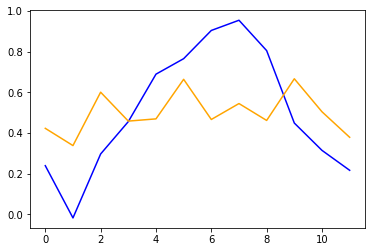

In [276]:
y_pred = model.predict(X_test)
plt.plot(Y_test,color='blue')
plt.plot(y_pred,color='orange')

# Data scaling

In [252]:
X_train,X_test, Y_train, Y_test=future[:-12],future[-12:],air_temp[:-12],air_temp[-12:]
scaler= MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
scaler.fit(Y_train)
Y_train=scaler.transform(Y_train)
Y_test=scaler.transform(Y_test)

In [257]:
model.fit(X_train, Y_train, batch_size=16, epochs=50, verbose=1)

Epoch 1/50
120/120 [==============================] - 0s 82us/step - loss: 0.0654
Epoch 2/50
120/120 [==============================] - 0s 81us/step - loss: 0.0658
Epoch 3/50
120/120 [==============================] - 0s 75us/step - loss: 0.0654
Epoch 4/50
120/120 [==============================] - 0s 69us/step - loss: 0.0651
Epoch 5/50
120/120 [==============================] - 0s 89us/step - loss: 0.0649
Epoch 6/50
120/120 [==============================] - 0s 81us/step - loss: 0.0649
Epoch 7/50
120/120 [==============================] - 0s 79us/step - loss: 0.0652
Epoch 8/50
120/120 [==============================] - 0s 82us/step - loss: 0.0662
Epoch 9/50
120/120 [==============================] - 0s 77us/step - loss: 0.0646
Epoch 10/50
120/120 [==============================] - 0s 103us/step - loss: 0.0655
Epoch 11/50
120/120 [==============================] - 0s 88us/step - loss: 0.0651
Epoch 12/50
120/120 [==============================] - 0s 106us/step - loss: 0.0653
Epoch 13/50

In [258]:
y_pred = model.predict(X_test)
Y_prediction=pd.DataFrame(scaler.inverse_transform(y_pred),index=future1[-12:].index)
y_train=pd.DataFrame(scaler.inverse_transform(Y_train),index=future1[:-12].index)

In [259]:
X_test

array([[-0.01798882],
       [-0.05097179],
       [-0.00213047],
       [ 0.09717065],
       [ 0.06246135],
       [ 0.00477151],
       [ 0.05745588],
       [ 0.02871609],
       [ 0.10080258],
       [-0.00575009],
       [-0.04241327],
       [-0.0699945 ]])

# Predict the future 2020 temperature data

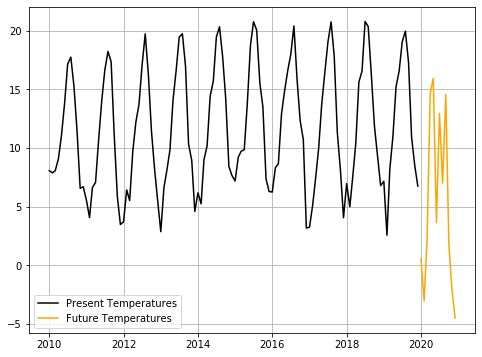

In [260]:
plt.figure(figsize=(8,6))
plt.plot(y_train,label = 'Present Temperatures',color='black')
plt.plot(Y_prediction,label='Future Temperatures',color='orange')
plt.legend(loc='best')
plt.grid(True)

Due to less data we have (from 2010 to 2019) 
We could not get the appropriate prediction for future temperautres of 2020

<img src="ipynb.images/ice_sheet_gif4.webp" width=400 />